Using the old model prior to meeting to verify the recreation of the results.

In [26]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import qutip

import system.old_old_theoretical as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

5.64218779844735


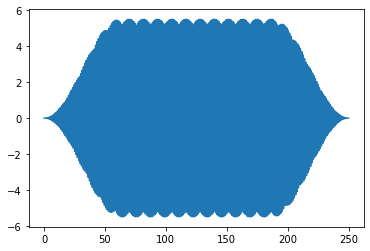

In [27]:
offset = 0.1
tlist = np.linspace(0, 250, 2000)
print(system.first_energy_spacing/3 - offset)
pulse_gen.setup(amplitude=5.5, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=0.5, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))

In [28]:
tlist = np.linspace(0, 1000, 1000*10)
solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=True)

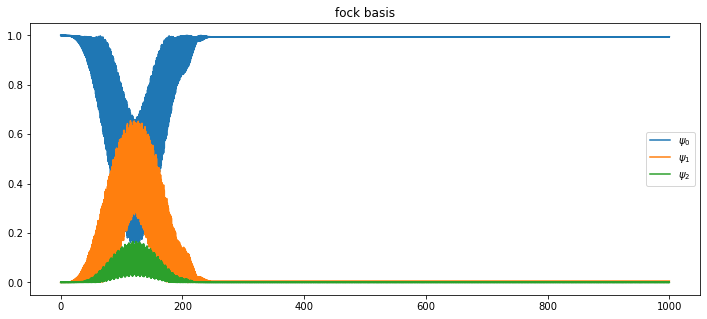

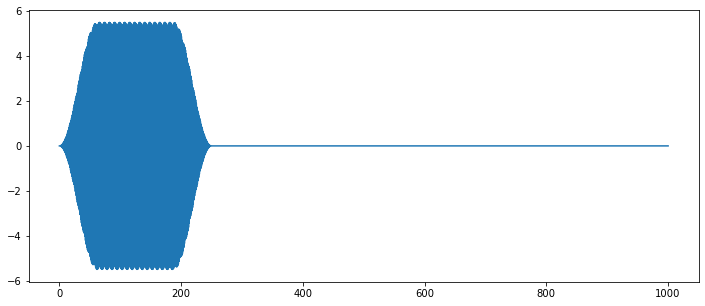

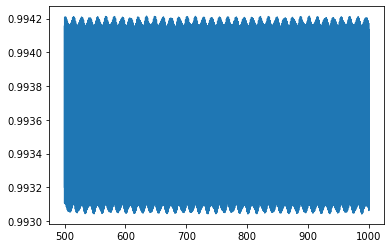

In [29]:
expectation_values_fock = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values_fock)):
    ax.plot(tlist, expectation_values_fock[i], label="$\psi_{%i}$" % i)
plt.legend()
plt.title("fock basis")
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))
plt.show()
plt.plot(tlist[-5000:], expectation_values_fock[0][-5000:])

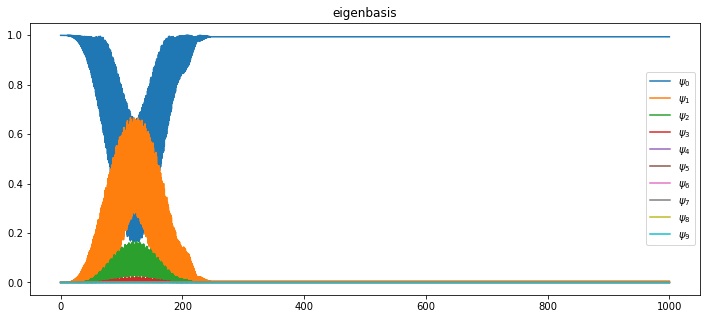

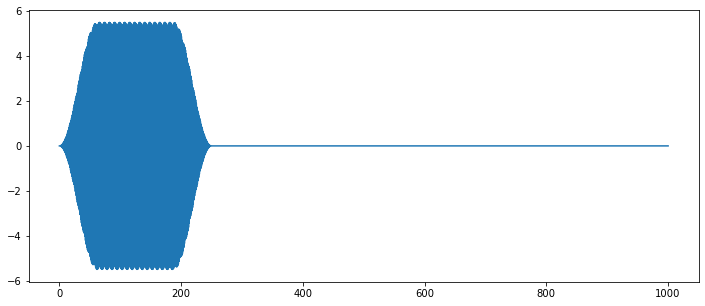

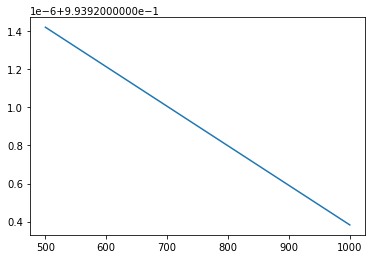

In [30]:
expectation_values_eigenbasis = expect.get_all_expectation_values(solution.states, system.H0.eigenstates()[1])
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values_eigenbasis)):
    ax.plot(tlist, expectation_values_eigenbasis[i], label="$\psi_{%i}$" % i)
plt.legend()
plt.title("eigenbasis")
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))
plt.show()
plt.plot(tlist[-5000:], expectation_values_eigenbasis[0][-5000:])